# Build a classification model using Naive Bayes for salary data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
salary_train=pd.read_csv("C:/Users/HP/Desktop/Excelr_Assignment/Naive Bayes/SalaryData_Train.csv")
salary_test=pd.read_csv("C:/Users/HP/Desktop/Excelr_Assignment/Naive Bayes/SalaryData_Test.csv")

In [3]:
#listing the top 5 head variables of given dataset
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#listing the top 5 head variables of given dataset
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

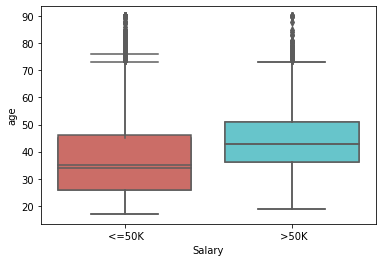

In [17]:
# visualization for salary data set with input and output variable by boxplot by training data set
sns.boxplot(x="Salary",y="age",data=salary_train,palette = "hls")
sns.boxplot(x="Salary",y="age",data=salary_test,palette = "hls")

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [10]:
ignb = GaussianNB()
imnb = MultinomialNB()


In [11]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()

In [12]:
for i in string_columns:
    salary_train[i] = number.fit_transform(salary_train[i])
    salary_test[i] = number.fit_transform(salary_test[i])

In [13]:
colnames = salary_train.columns
len(colnames[0:13])
trainX = salary_train[colnames[0:13]]
trainY = salary_train[colnames[13]]
testX  = salary_test[colnames[0:13]]
testY  = salary_test[colnames[13]]

In [14]:
sgnb = GaussianNB()
smnb = MultinomialNB()
spred_gnb = sgnb.fit(trainX,trainY).predict(testX)
confusion_matrix(testY,spred_gnb)
print ("Accuracy of Model: ",(10759+1209)/(10759+601+2491+1209))

Accuracy of Model:  0.7946879150066402


In [15]:
spred_mnb = smnb.fit(trainX,trainY).predict(testX)
confusion_matrix(testY,spred_mnb)
print("Accuracy of Model:",(10891+780)/(10891+780+2920+780))

Accuracy of Model: 0.7592869689675362
